<a href="https://colab.research.google.com/github/Brainbellworld/DATA-SCIENCE_ML_AI/blob/main/Abdulwasiu_housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OLATUNJI_ABDULWASIU_HOUSE_PRICE_PREDICTION**

In [153]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
print('Done')

Done


In [154]:
df =  pd.read_csv('/content/train.csv')

In [155]:
df.shape

(1460, 81)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

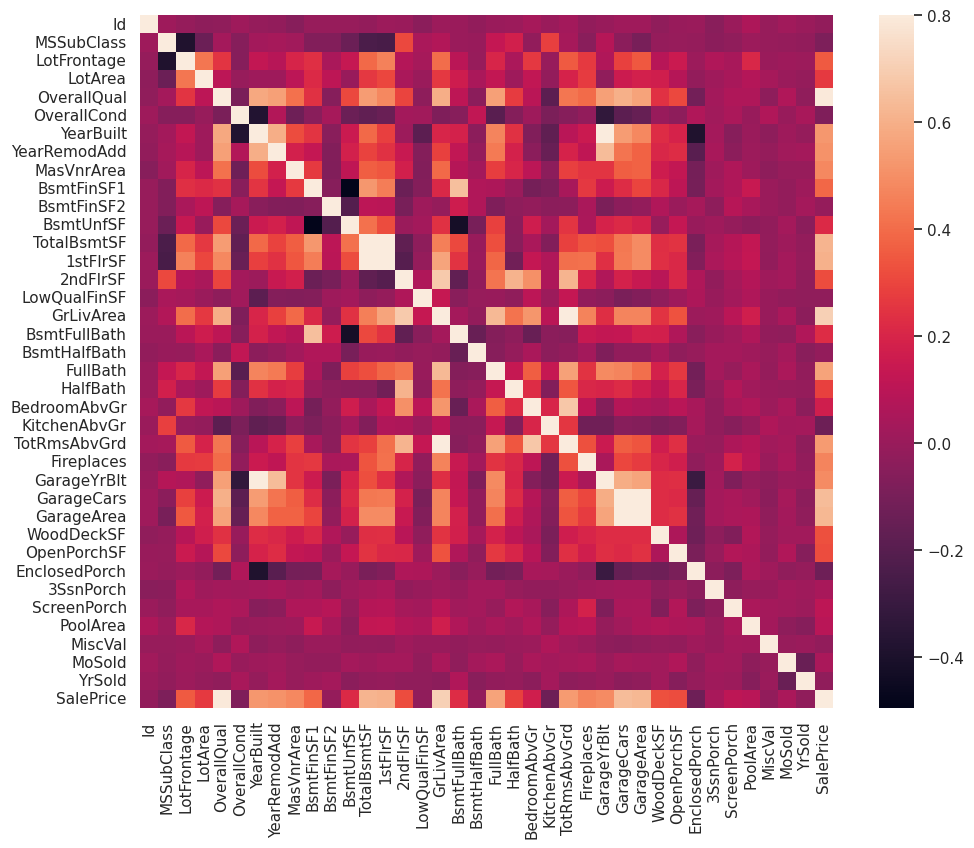

In [157]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);

In [158]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [159]:
data = df[['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd','MasVnrArea',
          'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
          'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
          'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]


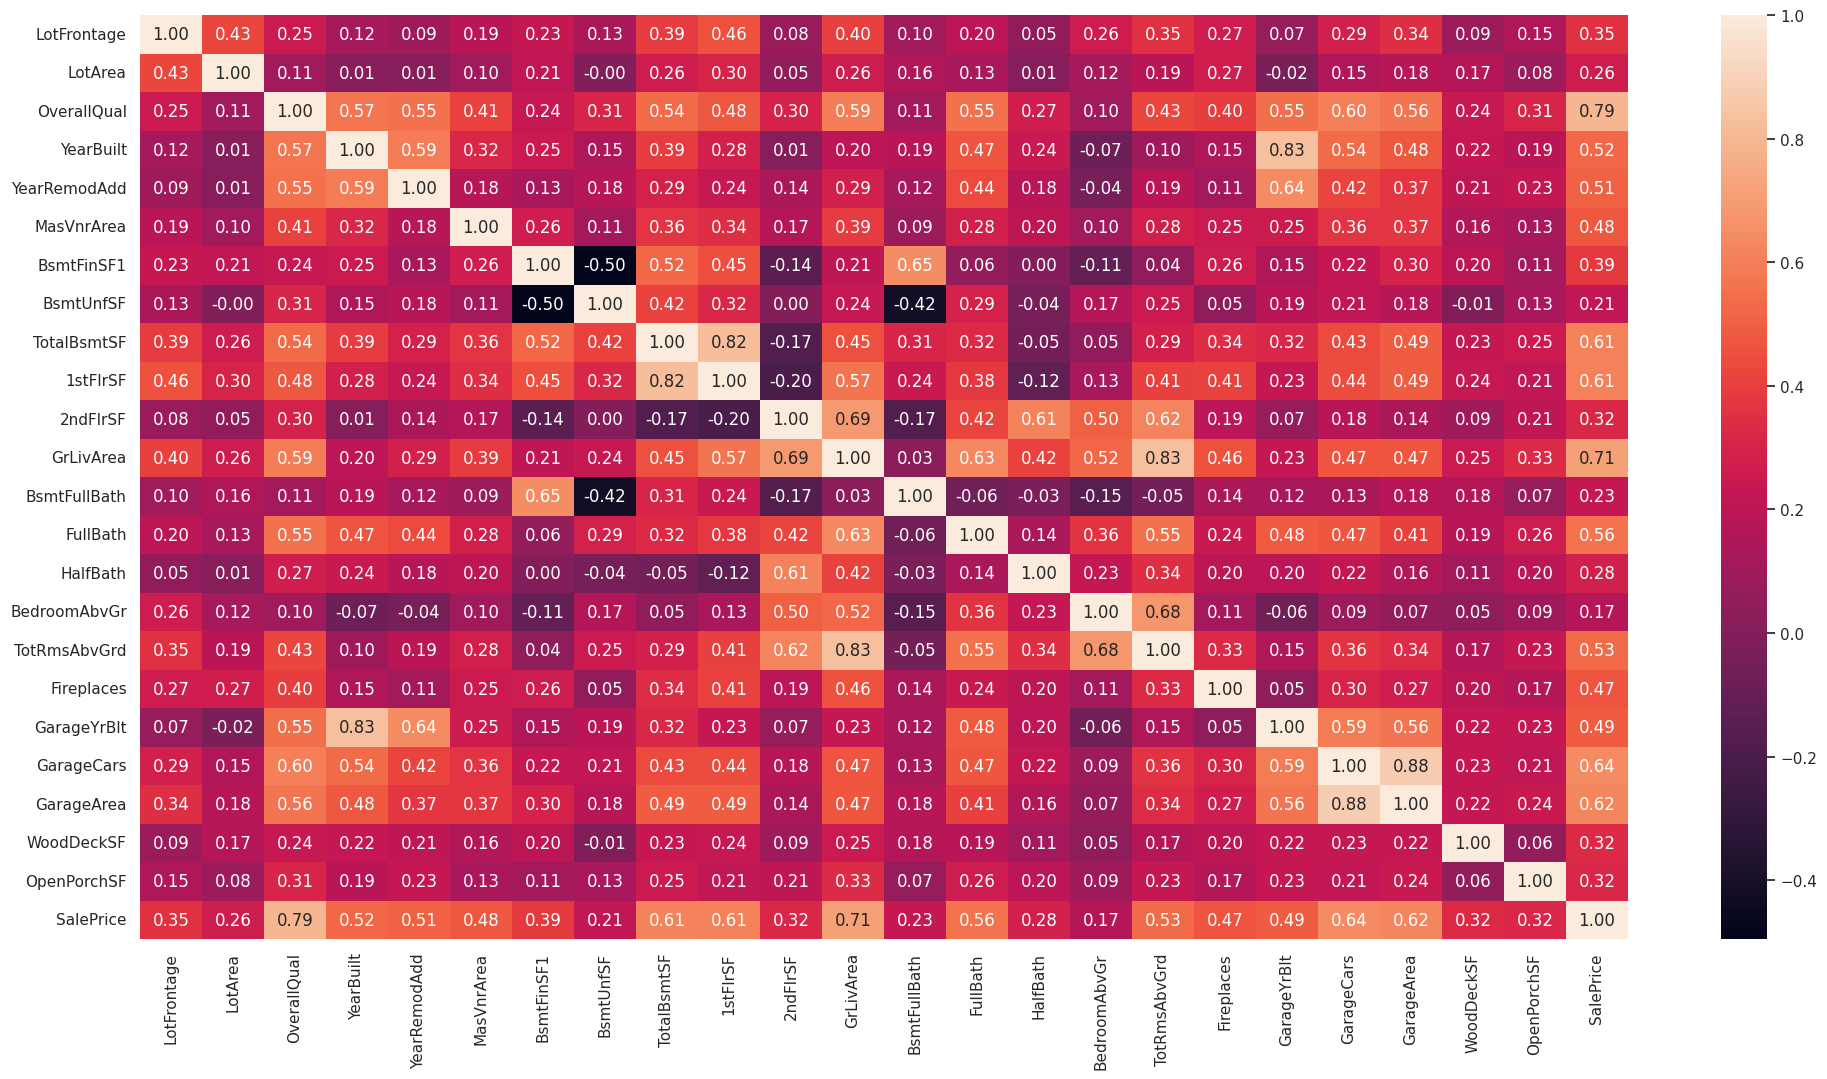

In [160]:
plt.figure(figsize = (24,12))
sb.heatmap(data.corr(), annot=True, fmt=".2f");

In [161]:
data = data[['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF',
             'GrLivArea',  'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice']]

data.head()

,OverallQual,YearBuilt,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,7,2003,856,856,1710,2,8,548,208500
1,6,1976,1262,1262,1262,2,6,460,181500
2,7,2001,920,920,1786,2,6,608,223500
3,7,1915,756,961,1717,1,7,642,140000
4,8,2000,1145,1145,2198,2,9,836,250000


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   GrLivArea     1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   TotRmsAbvGrd  1460 non-null   int64
 7   GarageArea    1460 non-null   int64
 8   SalePrice     1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


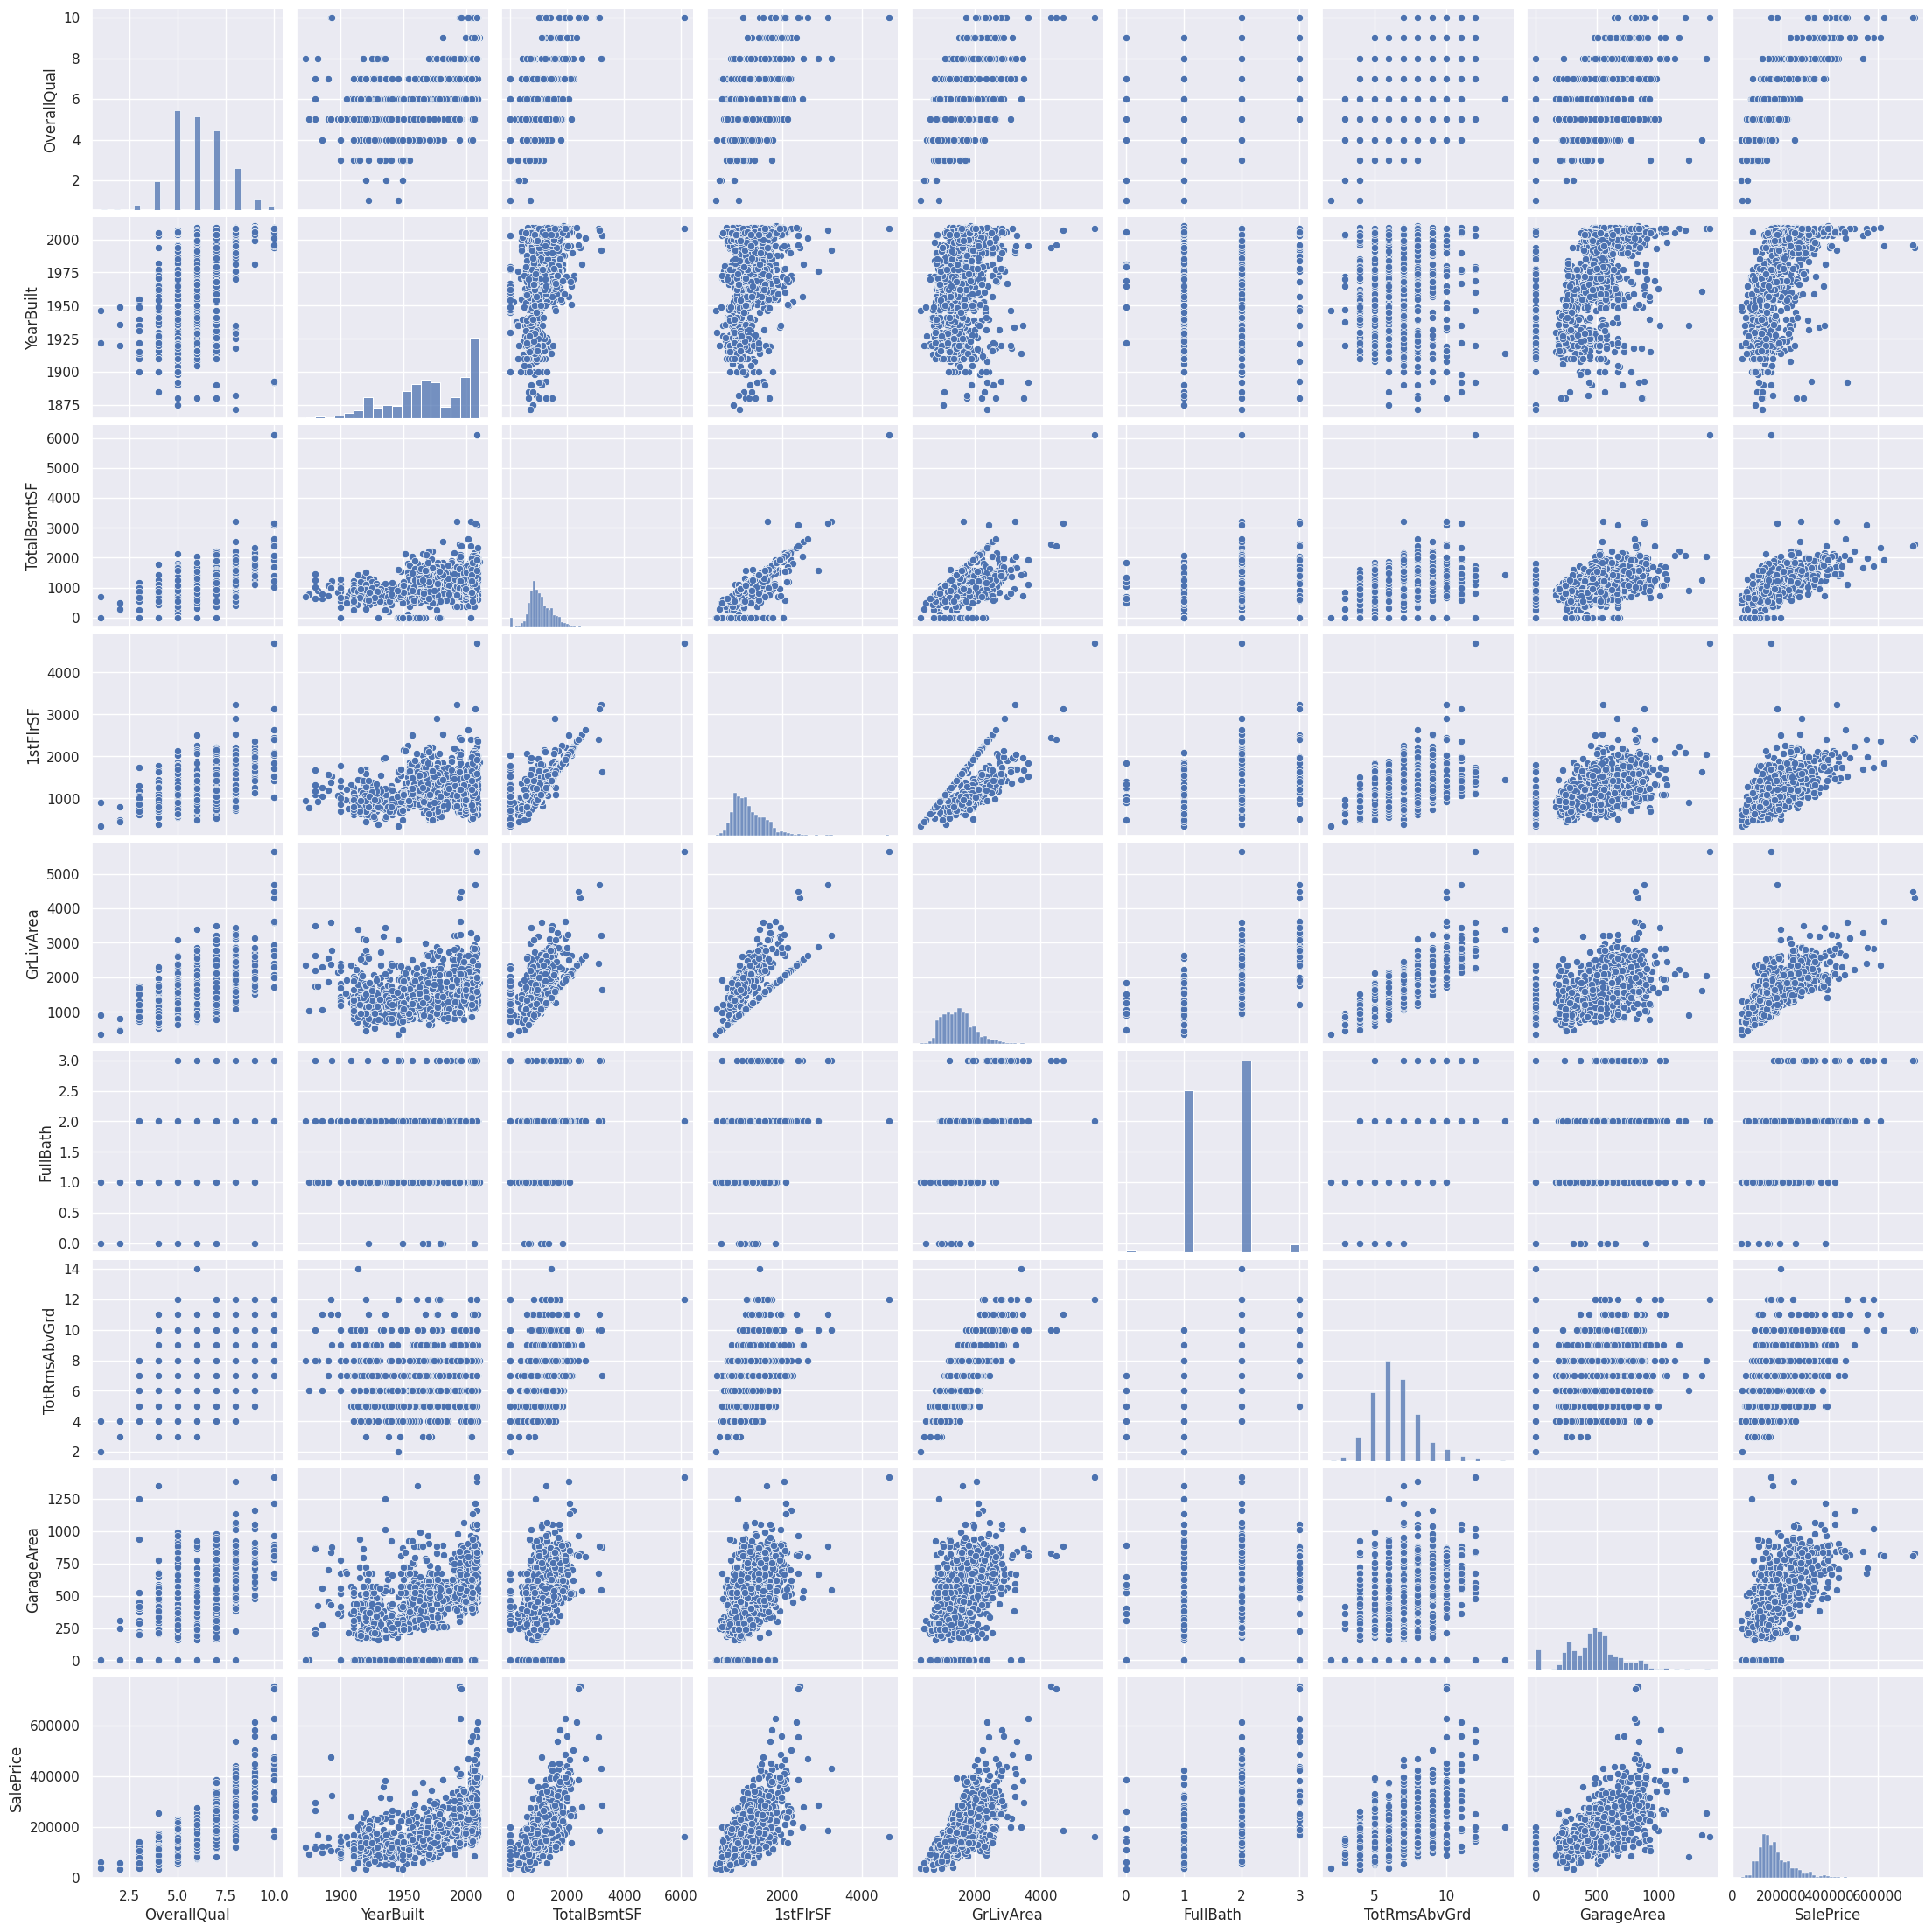

In [163]:
#scatterplot
sb.set()
sb.pairplot(data, size = 2.5)
plt.show();

In [164]:
final_data = data.copy()

In [165]:
data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'SalePrice'],
      dtype='object')

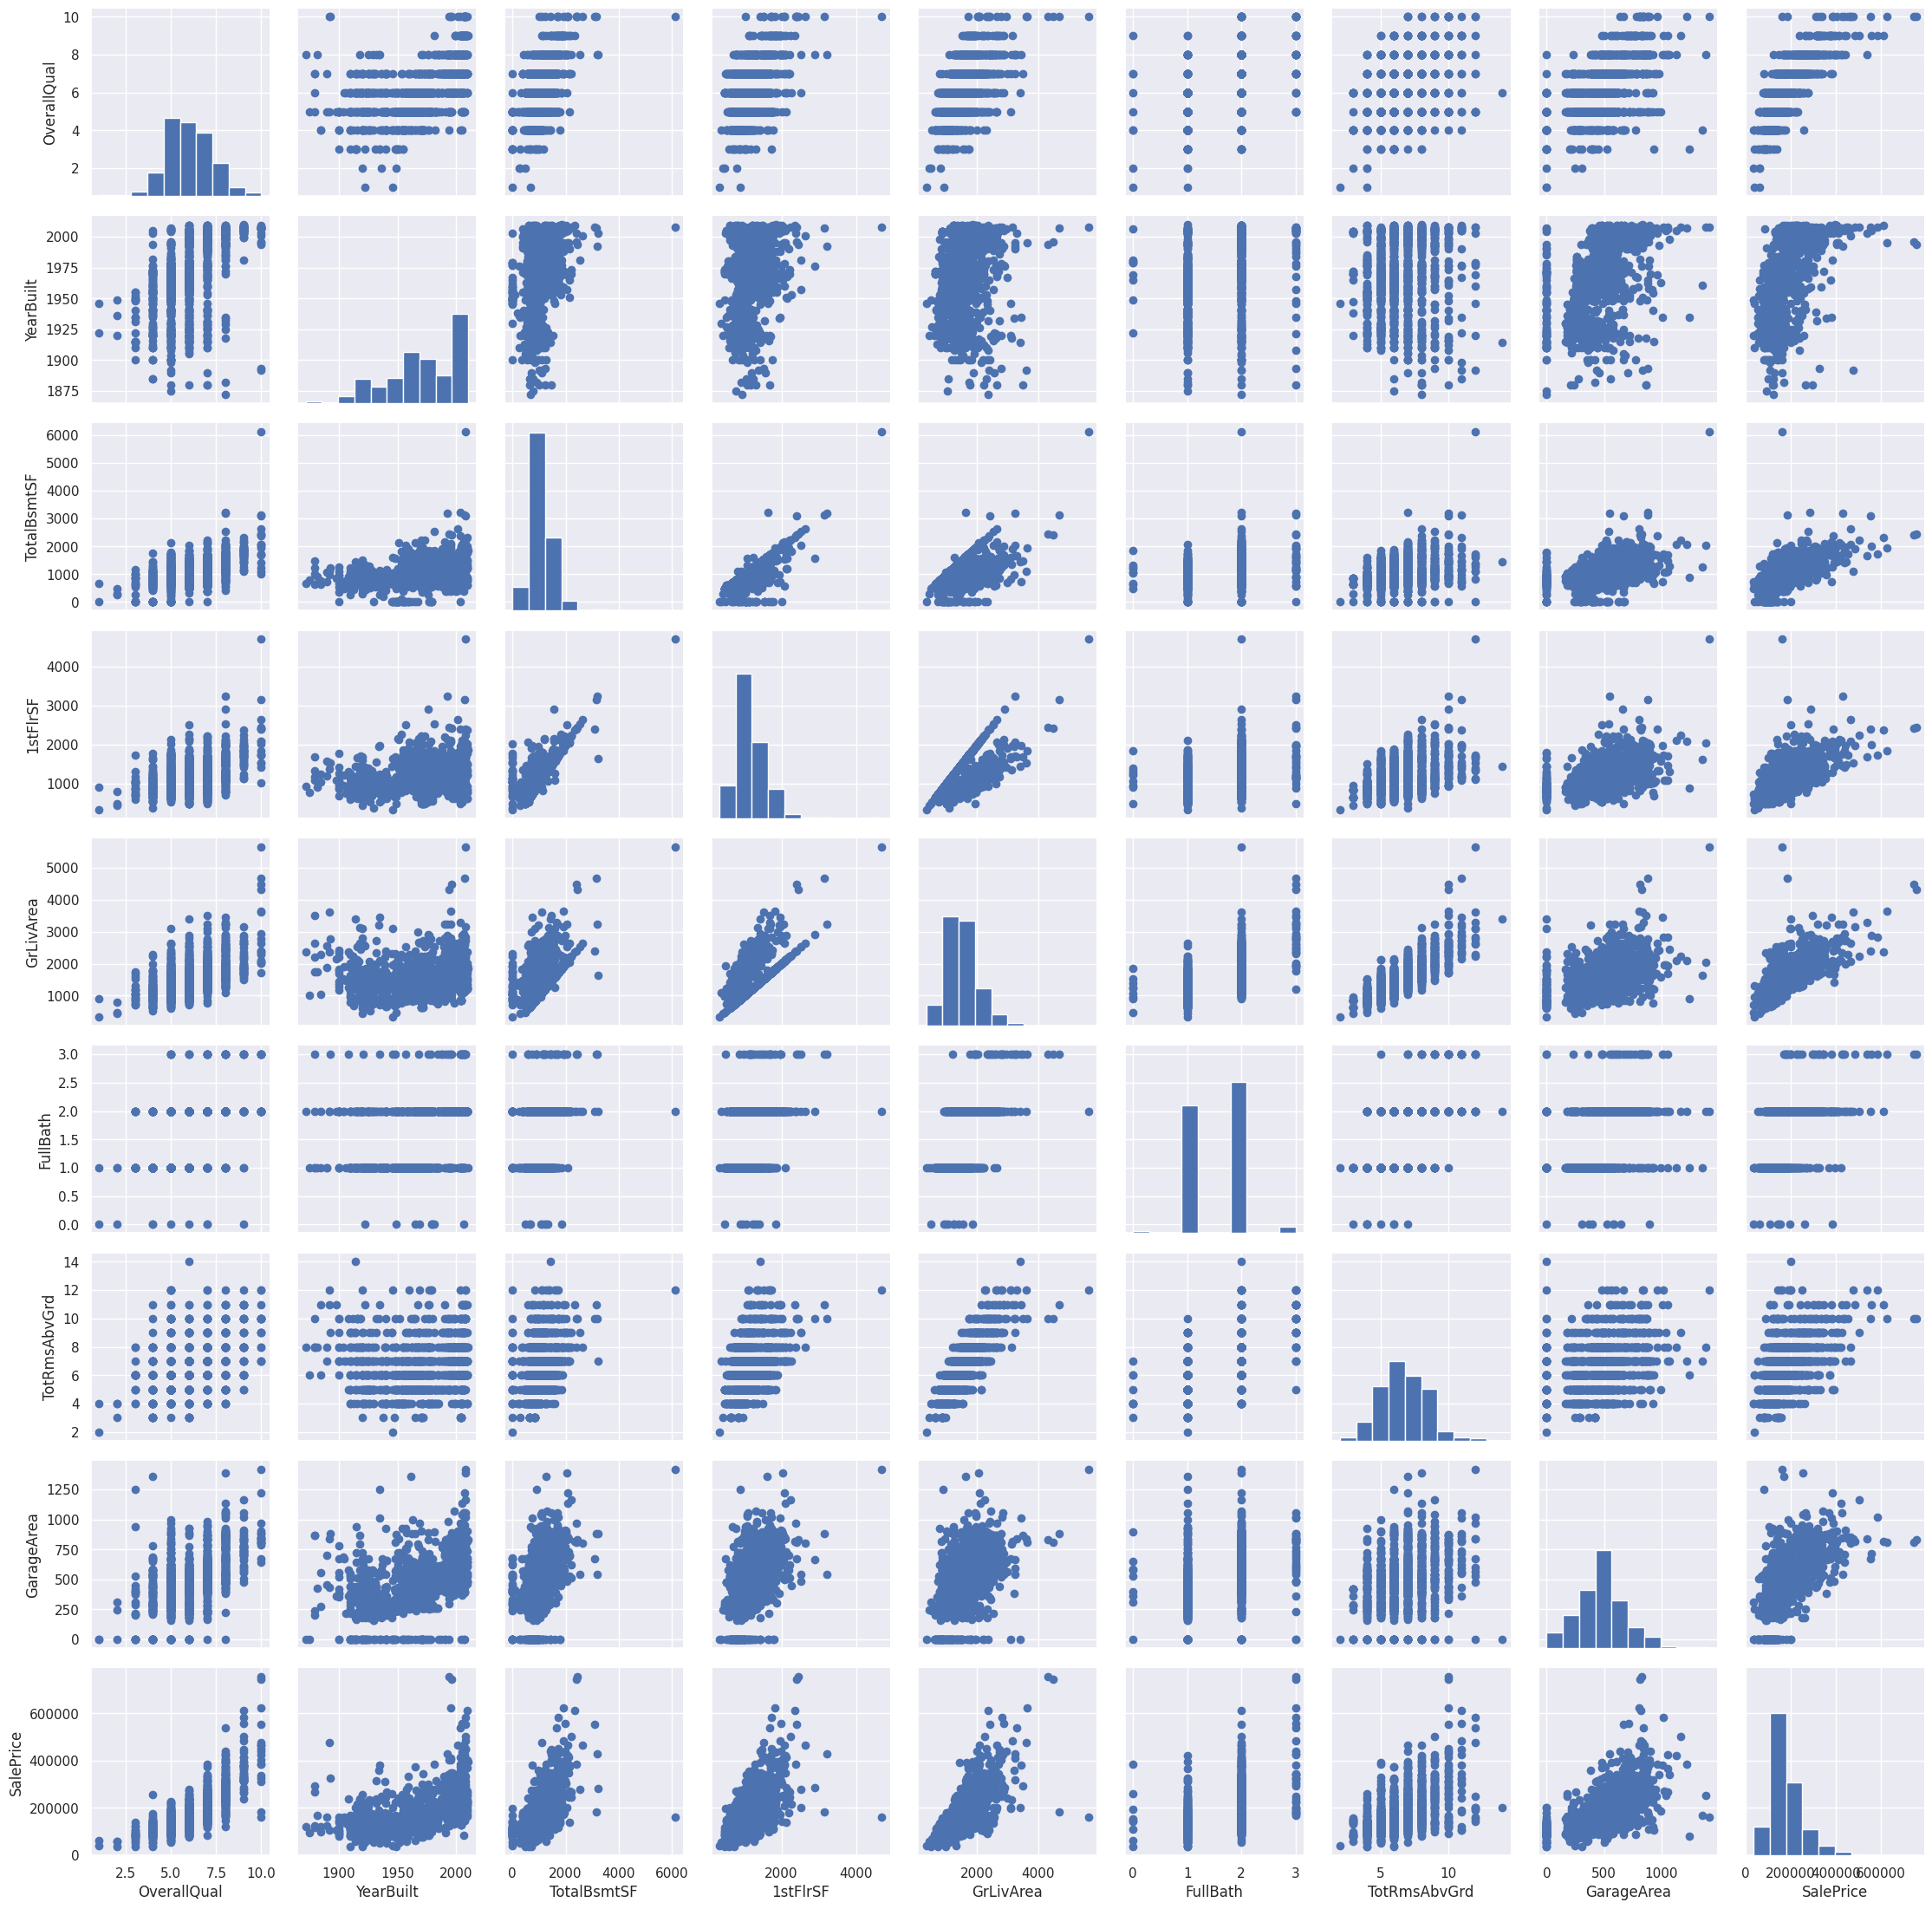

In [166]:
# pairgrid

g = sb.PairGrid(data = final_data, vars = ['OverallQual', 'YearBuilt', 'TotalBsmtSF',
                                           '1stFlrSF', 'GrLivArea', 'FullBath',
                                           'TotRmsAbvGrd', 'GarageArea', 'SalePrice'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [167]:
def log_transform(feature):
    final_data[feature] = np.log1p(final_data[feature].values)

In [168]:
log_transform('TotalBsmtSF')
log_transform('1stFlrSF')
log_transform('GrLivArea')
log_transform('GarageArea')
log_transform('SalePrice')

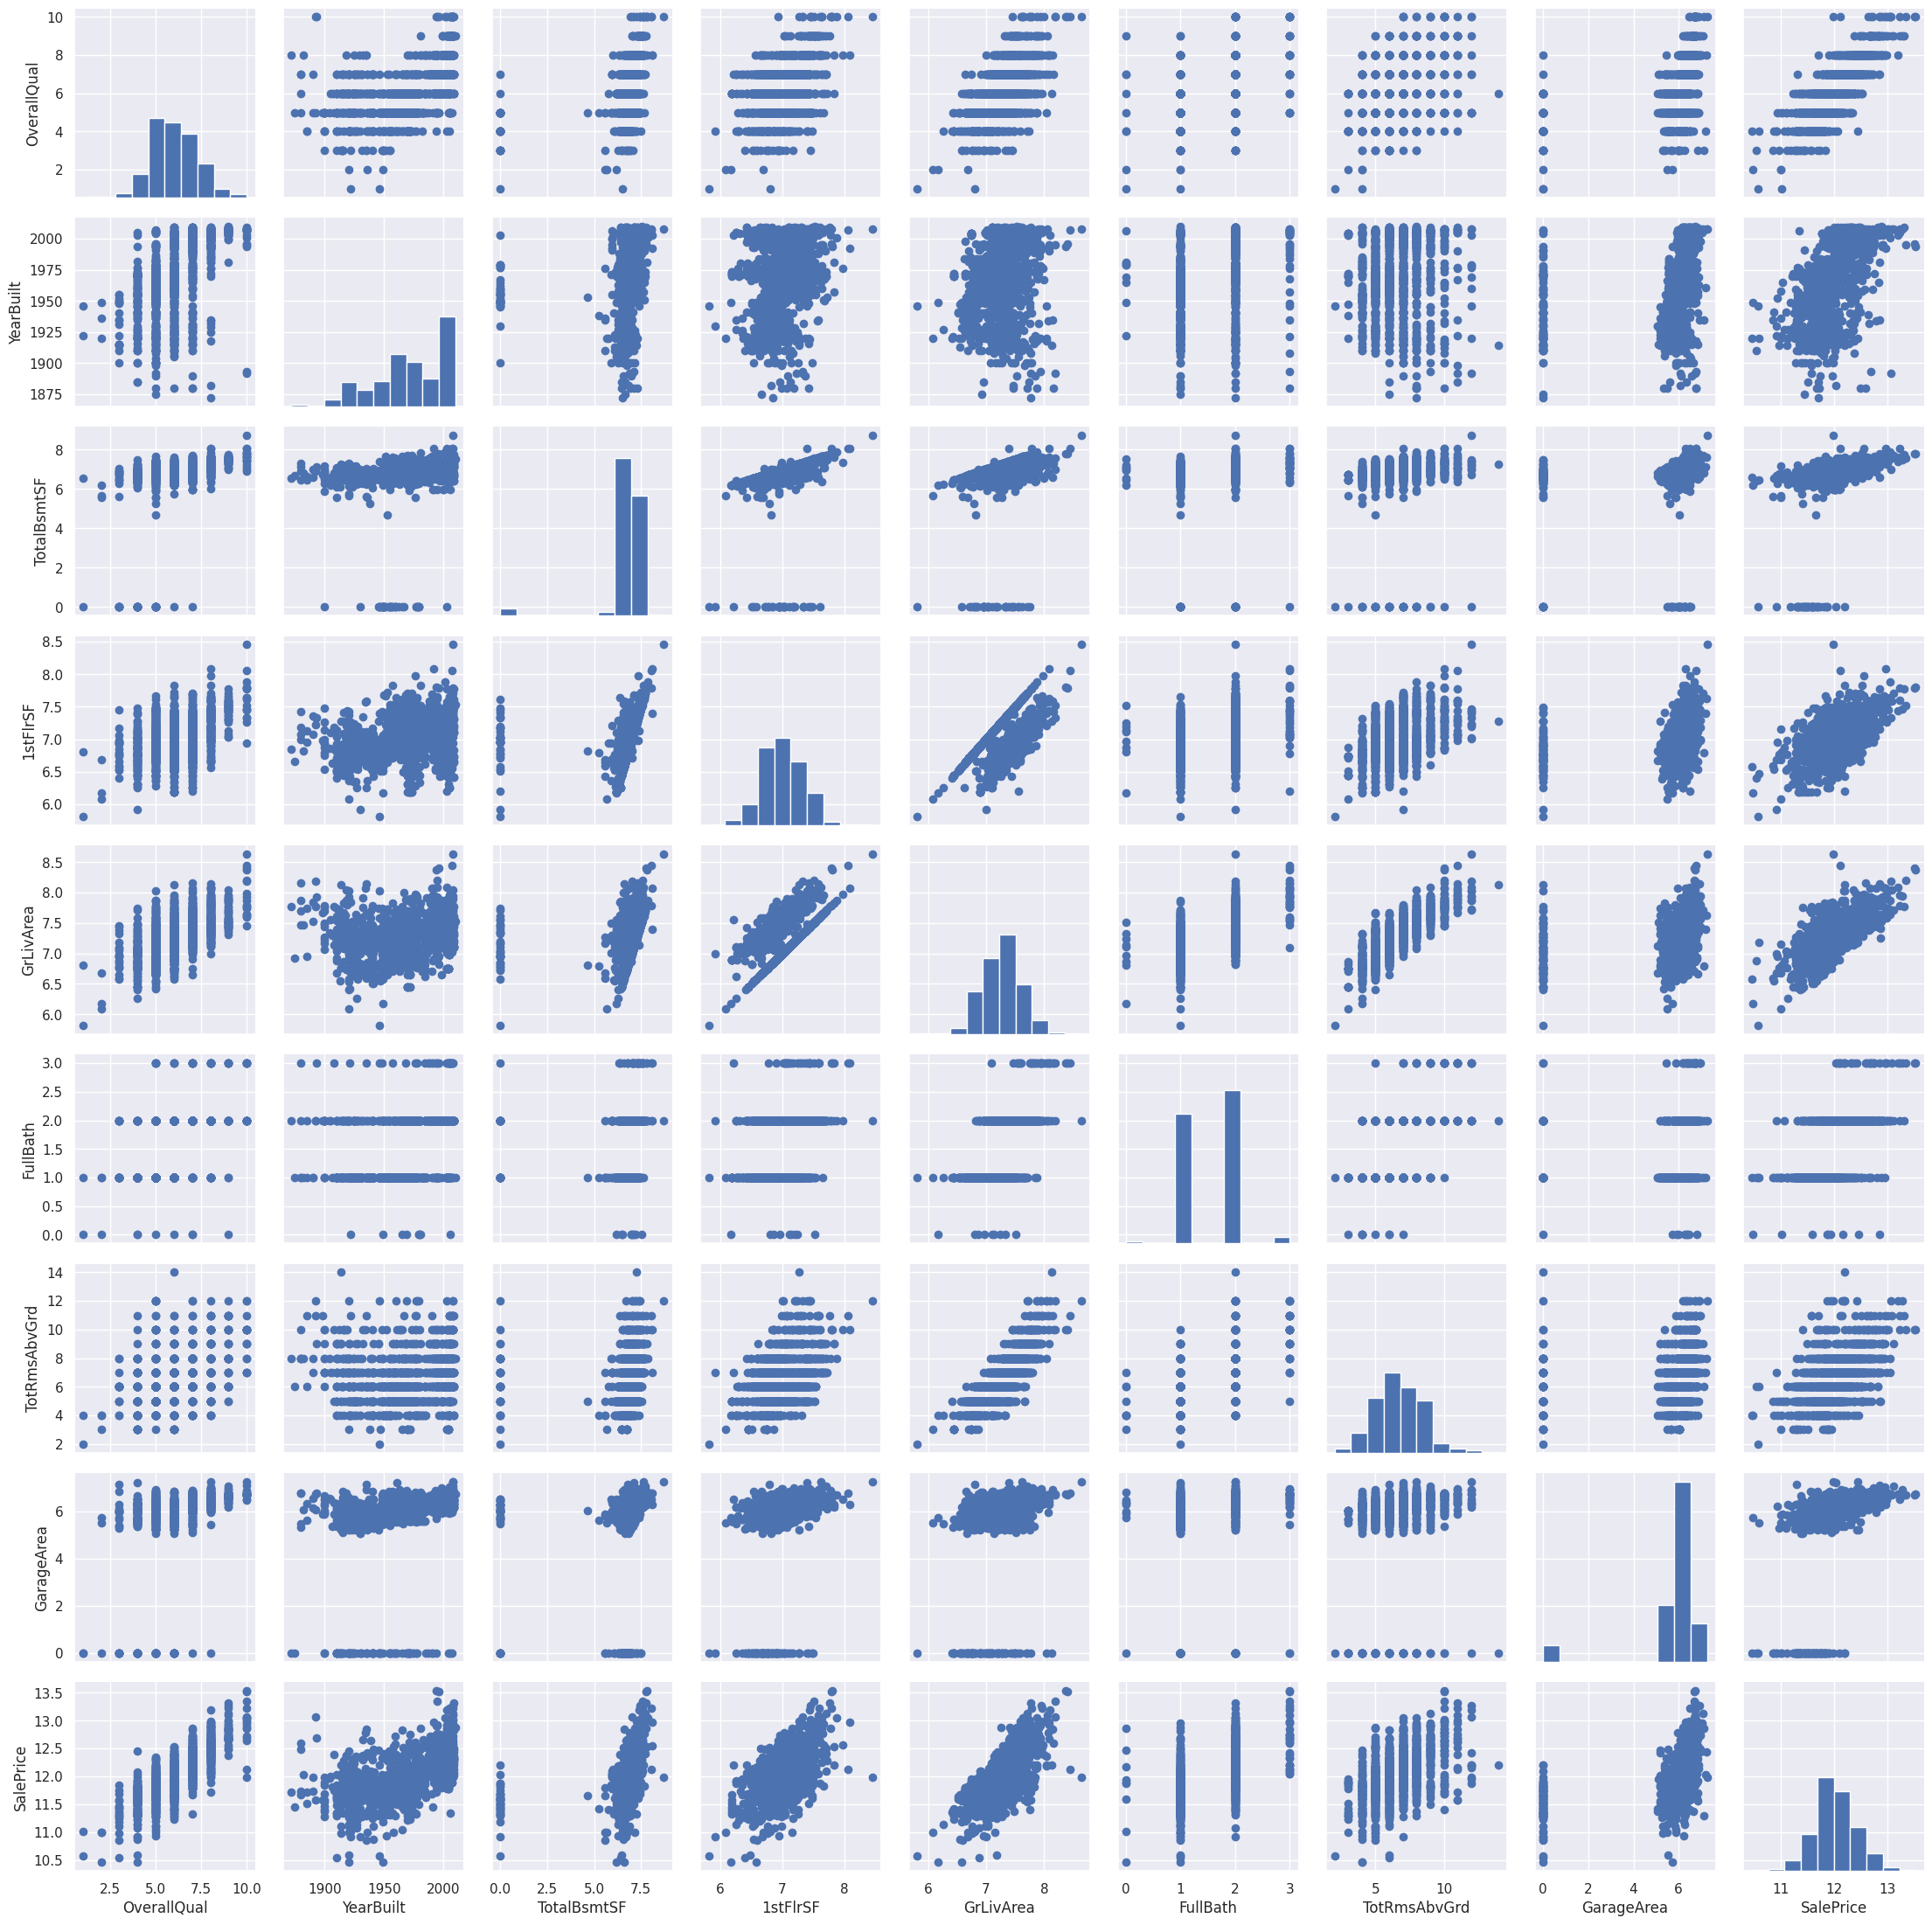

In [169]:
g = sb.PairGrid(data = final_data, vars = ['OverallQual', 'YearBuilt', 'TotalBsmtSF',
                                           '1stFlrSF', 'GrLivArea', 'FullBath',
                                           'TotRmsAbvGrd', 'GarageArea', 'SalePrice'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

In [170]:
final_data.drop('YearBuilt', axis = 1, inplace = True)
final_data

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea,SalePrice
0,7,6.753438,6.753438,7.444833,2,8,6.308098,12.247699
1,6,7.141245,7.141245,7.141245,2,6,6.133398,12.109016
2,7,6.825460,6.825460,7.488294,2,6,6.411818,12.317171
3,7,6.629363,6.869014,7.448916,1,7,6.466145,11.849405
4,8,7.044033,7.044033,7.695758,2,9,6.729824,12.429220
...,...,...,...,...,...,...,...,...
1455,6,6.860664,6.860664,7.407318,2,7,6.133398,12.072547
1456,6,7.341484,7.637234,7.637234,2,7,6.216606,12.254868
1457,7,7.050123,7.080868,7.758333,2,9,5.533389,12.493133
1458,5,6.983790,6.983790,6.983790,1,5,5.484797,11.864469


In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [172]:
x = final_data.drop(columns = ['SalePrice'], axis=1)
y = final_data['SalePrice']

Splitting the data into Training and Testing data

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)


In [174]:
print(x.shape, x_train.shape, x_test.shape)

(1460, 7) (1022, 7) (438, 7)


In [175]:
# Linear Regression Model
model = LinearRegression()

In [176]:
model.fit(x_train, y_train)

LinearRegression()

In [177]:
x_test_prediction = model.predict(x_test)

In [178]:
rms = mean_squared_error(y_test, x_test_prediction, squared=False)

In [179]:
print(rms)

0.18264199764839698


In [180]:
test =  pd.read_csv('/content/test.csv')

In [181]:
test = test[['Id', 'OverallQual', 'TotalBsmtSF', '1stFlrSF',
             'GrLivArea',  'FullBath', 'TotRmsAbvGrd', 'GarageArea']]

test.head()

,Id,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageArea
0,1461,5,882.0,896,896,1,5,730.0
1,1462,6,1329.0,1329,1329,1,6,312.0
2,1463,5,928.0,928,1629,2,6,482.0
3,1464,6,926.0,926,1604,2,7,470.0
4,1465,8,1280.0,1280,1280,2,5,506.0


In [182]:
test.isnull().sum()

Id              0
OverallQual     0
TotalBsmtSF     1
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageArea      1
dtype: int64

In [183]:
test_final = test.dropna()

In [184]:
test_final.isnull().sum()

Id              0
OverallQual     0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageArea      0
dtype: int64

In [185]:
def log_transform(feature):
    test_final[feature] = np.log1p(test_final[feature].values)

In [186]:
log_transform('TotalBsmtSF')
log_transform('1stFlrSF')
log_transform('GrLivArea')
log_transform('GarageArea')

In [187]:
Id = test_final['Id']
test_final = test_final.drop(columns = ['Id'], axis=1)

In [188]:
lr_preds = np.expm1(model.predict(test_final))

In [189]:
lr_preds

array([117626.91876282, 165680.60256408, 149837.92096922, ...,
       139727.38464611, 100408.19042388, 212710.50647702])

In [190]:
final_test_prediction = lr_preds.astype(int)

In [191]:
final_test_prediction

array([117626, 165680, 149837, ..., 139727, 100408, 212710])

In [192]:
test_data = test.head()

In [193]:
predicted_SalePrice = pd.DataFrame({
                  "Id": Id,
                  "SalePrice": final_test_prediction})

In [199]:
# export predictions to external csv file
predicted_response.to_csv('/content/Abdulwasiu_House_Price_submission.csv', index=False)

In [195]:
predicted_SalePrice

,Id,SalePrice
0,1461,117626
1,1462,165680
2,1463,149837
3,1464,169532
4,1465,228451
...,...,...
1454,2915,78140
1455,2916,92363
1456,2917,139727
1457,2918,100408
